### **Project overview** 
*XYZCorp_LendingData.txt* dataset contain details for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc. With the help of this data we will create a model that will help loan issuer whom to give the loan in the future. 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading dataset
df = pd.read_table('E:\Imarticus\Capstone\Python Project - Bank Lending\XYZCorp_LendingData.txt', low_memory = False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.shape

(855969, 73)

Dataset have 73 features and 855969 rows.  

**Dependent feature** : default_ind (0 indicates person is non-defaulter and 1 indicates person is  defaluter)  

**Independent features** : id, member_id, loan_amnt, funded_amnt, funded_amnt_inv,
       term, int_rate, installment, grade, sub_grade, emp_title,
       emp_length, home_ownership, annual_inc, verification_status,
       issue_d, pymnt_plan, desc, purpose, title, zip_code,
       addr_state, dti, delinq_2yrs, earliest_cr_line,
       inq_last_6mths, mths_since_last_delinq, mths_since_last_record,
       open_acc, pub_rec, revol_bal, revol_util, total_acc,
       initial_list_status, out_prncp, out_prncp_inv, total_pymnt,
       total_pymnt_inv, total_rec_prncp, total_rec_int,
       total_rec_late_fee, recoveries, collection_recovery_fee,
       last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d,
       collections_12_mths_ex_med, mths_since_last_major_derog,
       policy_code, application_type, annual_inc_joint, dti_joint,
       verification_status_joint, acc_now_delinq, tot_coll_amt,
       tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m,
       open_il_24m, mths_since_rcnt_il, total_bal_il, il_util,
       open_rv_12m, open_rv_24m, max_bal_bc, all_util,
       total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [7]:
#counting variables acc. to datatype
df.dtypes.value_counts()

float64    49
object     21
int64       3
dtype: int64

Lets find categorical and numerical features in the dataset

In [8]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features: ', len(categorical_feature))
print('Categorical features : ',categorical_feature)
print('\n')
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical features: ', len(numerical_feature))
print('Numerical Features : ',numerical_feature)

Number of categorical features:  21
Categorical features :  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint']


Number of numerical features:  52
Numerical Features :  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc

**EDA**

In [9]:
#Extracting year from loan issue date for analysis
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_year'] = df['issue_d'].dt.year
df['issue_year'] = df['issue_year'].astype(object)

Text(0.5, 1.0, 'Count of defaulters & non-defaulters in data')

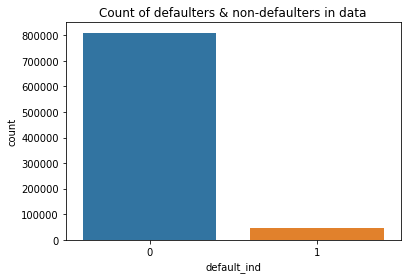

In [10]:
sns.countplot(x = 'default_ind', data = df)
plt.title('Count of defaulters & non-defaulters in data')

From above plot, we observed that dataset contain more no. of non-defaulter than defaulter. Data is highly imbalance.

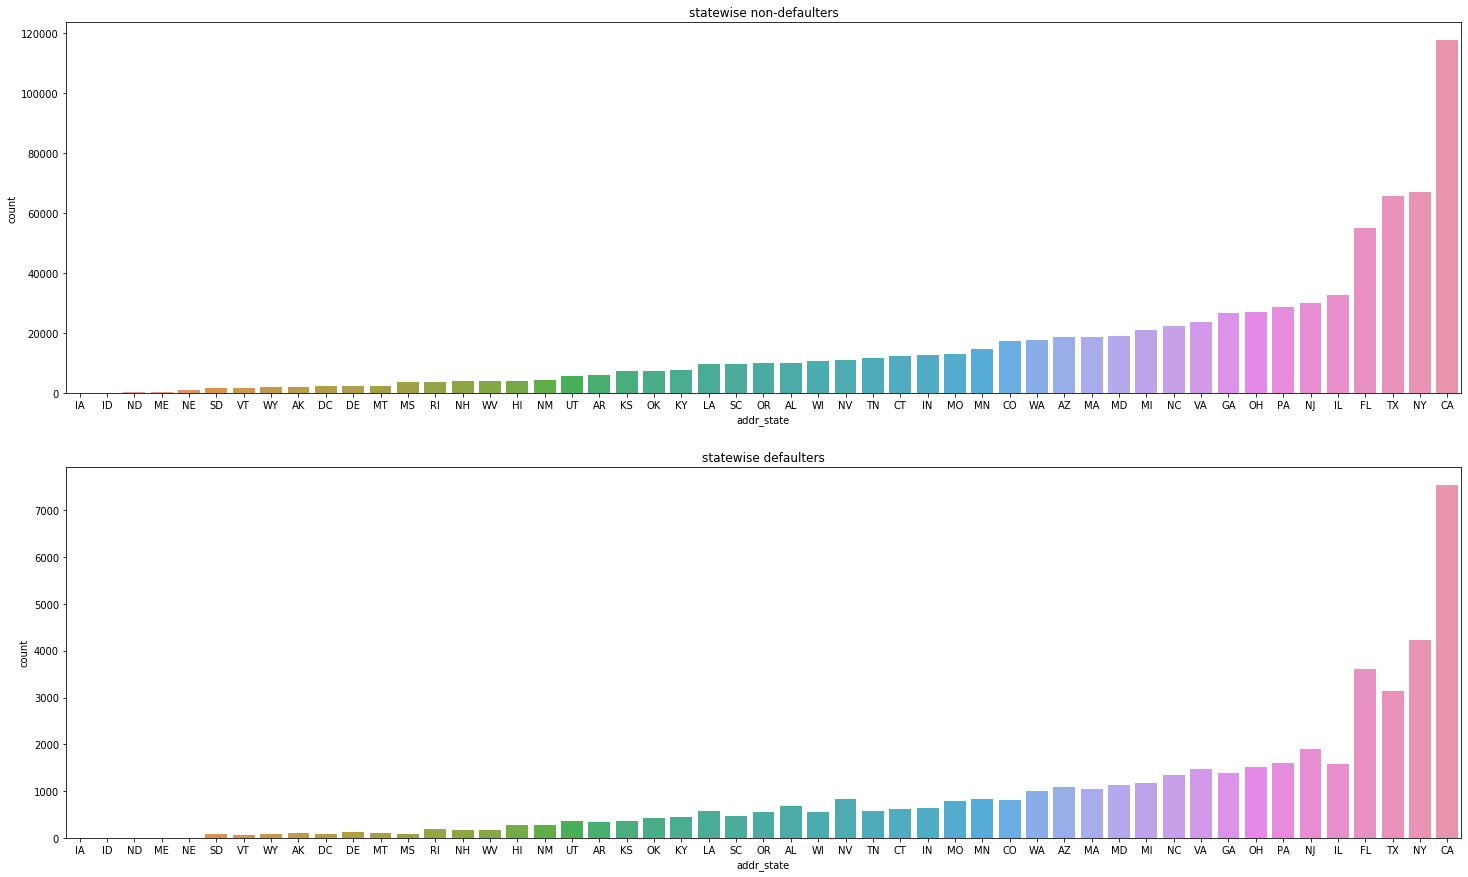

In [11]:
fig, ax = plt.subplots(2,1, figsize = (25,15))
od = df['addr_state'].value_counts(ascending = True).index
sns.countplot(x = 'addr_state', data = df[df['default_ind'] == 0], order=od, ax = ax[0])
sns.countplot(x = 'addr_state', data = df[df['default_ind'] == 1], order=od, ax = ax[1])
ax[0].set_title("statewise non-defaulters")
ax[1].set_title("statewise defaulters")
plt.show()

Text(0.5, 1.0, 'Yearly distribution of defaulters')

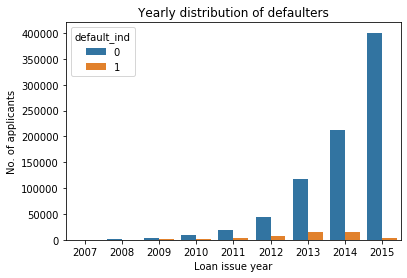

In [12]:
sns.countplot(x = 'issue_year', data =df, hue = 'default_ind')
plt.xlabel('Loan issue year')
plt.ylabel('No. of applicants')
plt.title('Yearly distribution of defaulters')

Year 2013 and 2014 have higher no. of defaulter as compare to other years.  
In 2015 no. of defaluter was reduced and no. of non-defaulters were increase.

Text(0.5, 1.0, 'Yearwise distribution of amount funded by investers')

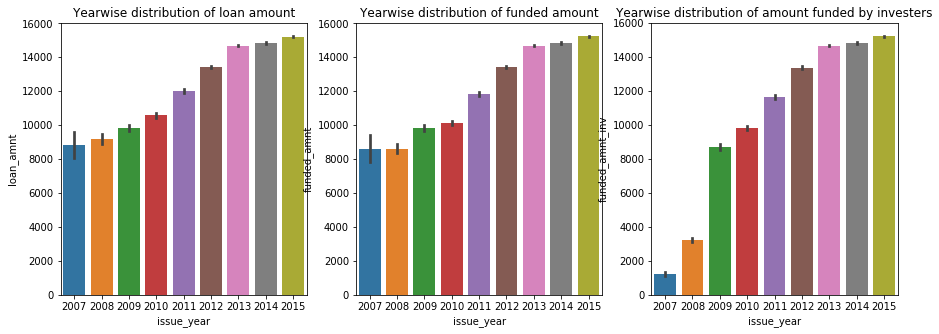

In [13]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
sns.barplot(x = 'issue_year', y = 'loan_amnt', data=df, ax= ax1)
sns.barplot(x = 'issue_year', y = 'funded_amnt', data=df, ax = ax2)
sns.barplot(x = 'issue_year', y = 'funded_amnt_inv', data=df, ax =ax3)
ax1.set_title('Yearwise distribution of loan amount')
ax2.set_title('Yearwise distribution of funded amount')
ax3.set_title('Yearwise distribution of amount funded by investers')

In year 2007,2008 & 2009 loan amount and amount funded by investers have quite variation but after 2009 we observed that all the amounts are quite similar.

Text(0.5, 1.0, '')

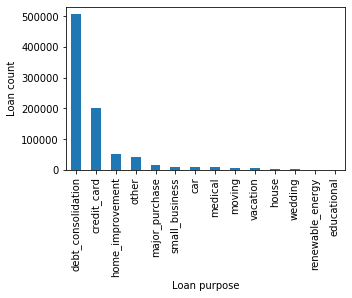

In [14]:
plt.figure(figsize = (5,3))
df['purpose'].value_counts().plot(kind = 'bar')
plt.xlabel('Loan purpose')
plt.ylabel('Loan count')
plt.title('')

From above graph, we can conclude that Debt consolidation is the major purpose of loan

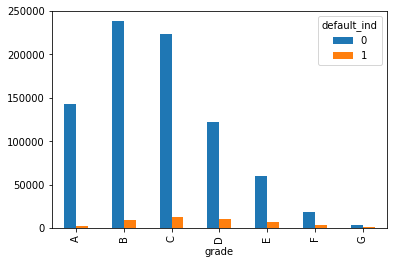

In [15]:
pd.crosstab(df.grade, df.default_ind).plot(kind = 'bar')

Person belongs to grade B and C are major applicants of loan and person belongs to grade C and D have higher defaulters as compare to other grades.

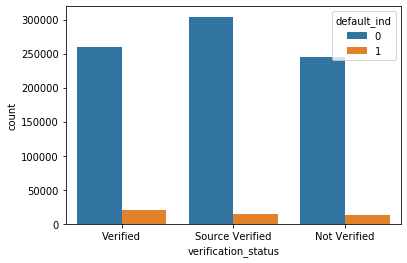

In [16]:
sns.countplot('verification_status',data=df,hue='default_ind')

Evenafter verfication status is verfied, no of defaulters are higher.

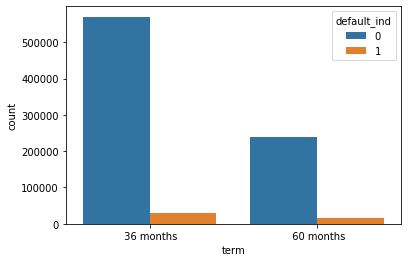

In [17]:
sns.countplot('term',data=df,hue='default_ind')

Term for most of the loan is 36 months, hence defaulters are higher as compare to 60 months.

Text(0, 0.5, 'income')

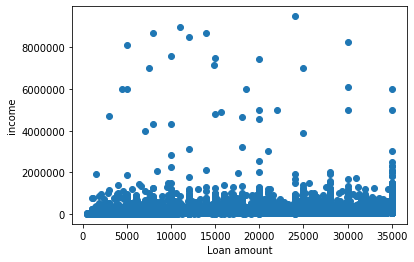

In [18]:
plt.scatter(x='loan_amnt', y ='annual_inc', data = df)
plt.xlabel('Loan amount')
plt.ylabel('income')

Person whos income is upto 2000000 are major applicant of loan.

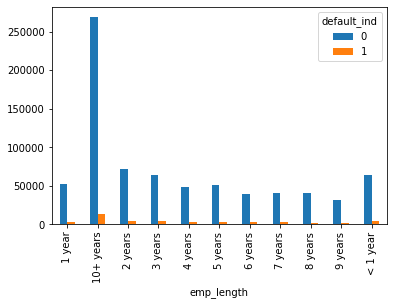

In [19]:
pd.crosstab(df.emp_length, df.default_ind).plot(kind = 'bar')

Applicant with 10+ years exp. are majorly applied for loan and also count of defaulter is higher.

**Data Preprocessing**

Lets check is there any null value in dataset.

In [20]:
# Function that calculate null value count and percentage
def null_value(data):
    null_cols = data.columns[data.isnull().any()]
    null_cols_count = data[null_cols].isnull().sum()
    percentage = (null_cols_count/len(data.index))*100
    null_value = pd.concat([null_cols_count, percentage], keys = ['count','Percentage'], axis =1)
    return null_value      

In [21]:
null_value(df)

,count,Percentage
emp_title,49443,5.776261
emp_length,43061,5.030673
desc,734157,85.769111
title,33,0.003855
mths_since_last_delinq,439812,51.381767
mths_since_last_record,724785,84.674211
revol_util,446,0.052105
last_pymnt_d,8862,1.035318
next_pymnt_d,252971,29.553757
last_credit_pull_d,50,0.005841


Dropping those columns which have more than 50 % of null values 

In [22]:
null_val = null_value(df)
cols_to_drop = null_val[null_val['Percentage']> 50].index
cols_to_drop

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [23]:
#function to drop columns from data
def drop_cols(data, cols):
    data = data.drop(cols, axis =1, inplace = True)

In [24]:
drop_cols(df, cols_to_drop)

In [25]:
df.shape

(855969, 53)

**Handling remaining missing values**

In [26]:
null_value(df)

,count,Percentage
emp_title,49443,5.776261
emp_length,43061,5.030673
title,33,0.003855
revol_util,446,0.052105
last_pymnt_d,8862,1.035318
next_pymnt_d,252971,29.553757
last_credit_pull_d,50,0.005841
collections_12_mths_ex_med,56,0.006542
tot_coll_amt,67313,7.863953
tot_cur_bal,67313,7.863953


Missing data belongs to categorical, datetime and numerical variables.   
categorical : emp_title, emp_length, title  
datetime : last_pymnt_d, next_pymnt_d, last_credit_pull_d  
numerical : revol_util, collections_12_mths_ex_med, tot_coll_amt, tot_cur_bal, total_rev_hi_lim

In [27]:
df[['emp_title', 'emp_length', 'title']].nunique()

emp_title     290912
emp_length        11
title          60991
dtype: int64

emp_title, title have high cardinality, hence dropping these columns.  
last_pymnt_d, next_pymnt_d, last_credit_pull_d are not required, hence dropping these columns also.

In [28]:
cols_to_drop= ['emp_title', 'title','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
drop_cols(df, cols_to_drop)
df.shape

(855969, 48)

In [29]:
#replacing null value with mode
df['emp_length']= df['emp_length'].fillna(df['emp_length'].mode()[0])

In [30]:
continuos_missing_data = ['revol_util','collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim']

In [31]:
df[continuos_missing_data].describe()

,revol_util,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,855523.000000,855913.000000,7.886560e+05,7.886560e+05,7.886560e+05
mean,55.019405,0.014230,2.254129e+02,1.397662e+05,3.216357e+04
std,23.811585,0.133712,1.048945e+04,1.539385e+05,3.769964e+04
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,37.600000,0.000000,0.000000e+00,2.987000e+04,1.400000e+04
50%,55.900000,0.000000,0.000000e+00,8.100850e+04,2.380000e+04
75%,73.500000,0.000000,0.000000e+00,2.087032e+05,3.990000e+04
max,892.300000,20.000000,9.152545e+06,8.000078e+06,9.999999e+06


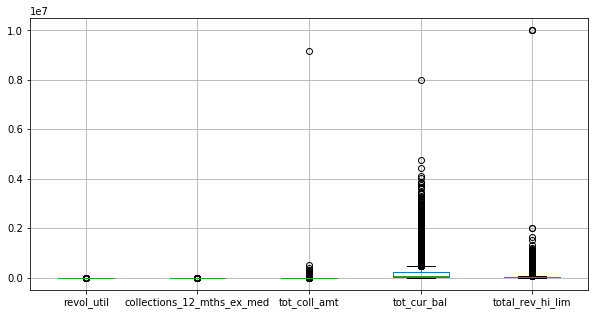

In [32]:
#plotting boxplot of the columns that have missing values
plt.figure(figsize = (10,5))
df[continuos_missing_data].boxplot()
plt.show()

In [33]:
# Replacing null with median
df['revol_util'].fillna(df['revol_util'].median(), inplace = True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(), inplace = True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace = True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(), inplace = True)

In [34]:
#Replacing null values with 0, as most of the values are 0
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(value = 0)

In [35]:
null_value(df)

,count,Percentage


Now, no null value in dataset.

**Handling categorical variables**

In [36]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(categorical_feature))

Number of categorical variables:  14


In [37]:
categorical_feature

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'issue_year']

In [38]:
df[categorical_feature].nunique()

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
pymnt_plan               2
purpose                 14
zip_code               931
addr_state              51
earliest_cr_line       697
initial_list_status      2
application_type         2
issue_year               9
dtype: int64

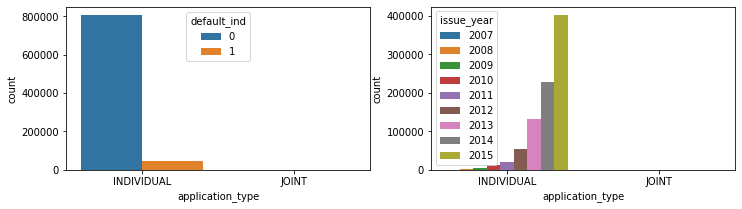

In [39]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,3))
sns.countplot('application_type',hue='default_ind',data = df, ax=ax1)
sns.countplot('application_type',hue='issue_year',data=df,ax=ax2)

appication type : JOINT have negligible values as compare to INDIVIDUAL.  
Zip_code, addr_state, earliest_cr_line have high cardinality. Hence dropping these columns.

In [40]:
cols_to_drop = ['zip_code','addr_state','earliest_cr_line','application_type','issue_year']

In [41]:
drop_cols(df, cols_to_drop)

In [42]:
df.shape

(855969, 43)

Dummy encoding

In [43]:
dum = ['term','home_ownership','purpose','pymnt_plan','initial_list_status','verification_status']

In [44]:
df = pd.get_dummies(df, columns = dum, drop_first = True)

Label encoding

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [46]:
df['grade']= label_encoder.fit_transform(df['grade'])
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])

In [47]:
yr_exp = {'10+ years' : 10,
          '< 1 year' : 0.5,
          '1 year' : 1,
          '3 years' : 3,
          '8 years' : 8,
          '9 years' : 9,
          '4 years' : 4,
          '5 years' : 5,
          '6 years' : 6,
          '2 years' : 2,
          '7 years' : 7}

In [48]:
#mapping emp_length with yr_exp (manual label endcoding)
df['emp_length'] = df['emp_length'].map(yr_exp)

In [49]:
df.policy_code.value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [50]:
# poicy_code is 1 for all the rows and will not add any value in model, hence dropping it. 
#'id' and 'member_id' are not required columns.
unnecessary_cols = ['id','member_id','policy_code']

In [51]:
drop_cols(df, unnecessary_cols)

In [52]:
#analysing numerical data
num_data = df.select_dtypes(include= 'float64')

In [53]:
num_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

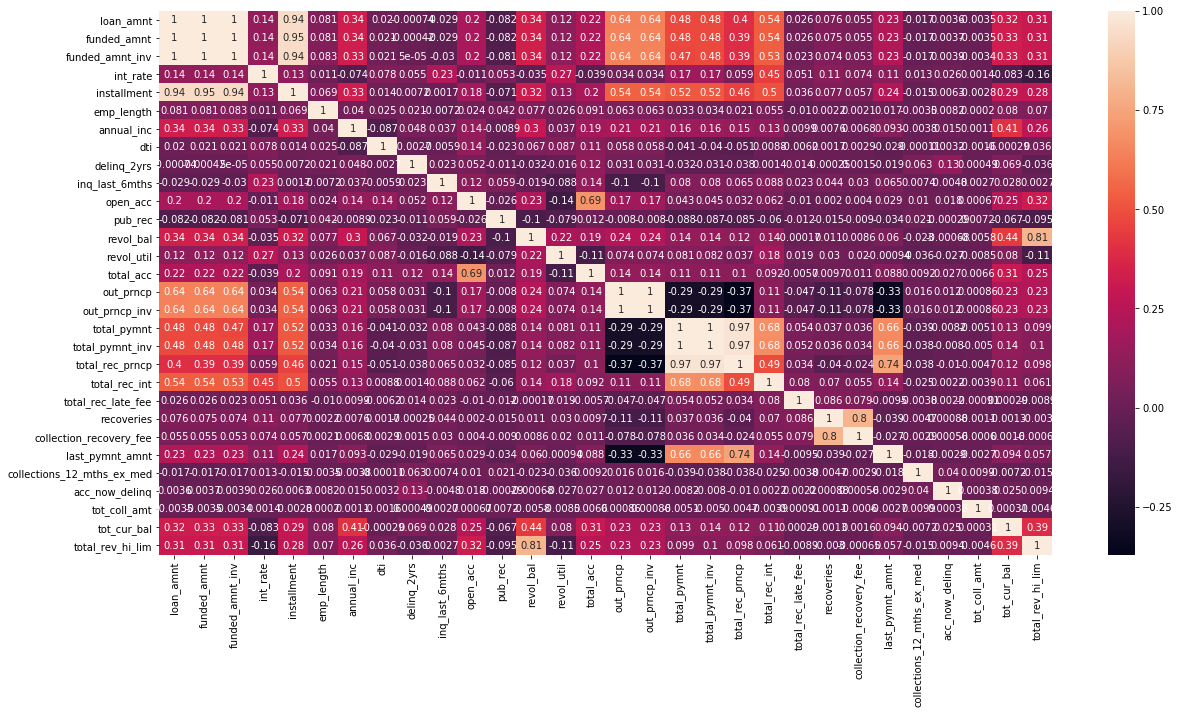

In [54]:
# plottng correlation between numerical data using heatmap
plt.figure(figsize=(20,10))
cor = num_data.corr()
sns.heatmap(cor, annot=True)
plt.show()

From above map, we observed that many independent variables are highly correlated. Hence dropping those features that have correlation greater than 0.8

In [55]:
corr_matrix = num_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [56]:
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'total_rev_hi_lim']

In [57]:
drop_cols(df, to_drop)

In [58]:
df.shape

(855969, 49)

In [59]:
df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'default_ind',
       'term_ 60 months', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'pymnt_plan_y',
       'initial_list_status_w', 'verification_status_Source Verified',
       

Dividing data into training and testing set.

In [60]:
train_df = df[df['issue_d'] < '2015-6-01']
test_df = df[df['issue_d'] >= '2015-6-01']

In [61]:
train_df.shape, test_df.shape

((598978, 49), (256991, 49))

In [62]:
# dropping issue_d as it is not required
train_df = train_df.drop('issue_d', axis =1)
test_df = test_df.drop('issue_d', axis =1)

In [63]:
X_train = train_df.drop('default_ind', axis =1)
X_test = test_df.drop('default_ind', axis =1)
y_train = train_df['default_ind']
y_test = test_df['default_ind']

In [64]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((598978, 47), (598978,), (256991, 47), (256991,))

Extracting numerical data and scaling that data with min-max scaler

In [65]:
X_train_num = X_train.select_dtypes(include= 'float64')
X_test_num = X_test.select_dtypes(include= 'float64')
X_train_cat = X_train.select_dtypes(exclude= 'float64')
X_test_cat = X_test.select_dtypes(exclude= 'float64')

In [66]:
#resetting index
X_train_num = X_train_num.reset_index(drop=True)
X_test_num = X_test_num.reset_index(drop=True)
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

In [67]:
X_train_num.shape, X_train_cat.shape, X_test_num.shape, X_test_cat.shape

((598978, 22), (598978, 25), (256991, 22), (256991, 25))

In [68]:
scaler = preprocessing.MinMaxScaler()

In [69]:
#scaling the data
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [70]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns.tolist())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns.tolist())

In [71]:
X_train = pd.concat([X_train_scaled,X_train_cat], axis = 1)
X_test = pd.concat([X_test_scaled,X_test_cat], axis = 1)

In [72]:
X_train.shape, X_test.shape

((598978, 47), (256991, 47))

As data is imbalance using SMOTE(sampling technique) to balance the data.

In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

In [74]:
X_res, y_res = sm.fit_sample(X_train, y_train)

In [75]:
X_res.shape, y_res.shape

((1105644, 47), (1105644,))

In [76]:
X_res.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,pymnt_plan_y,initial_list_status_w,verification_status_Source Verified,verification_status_Verified
0,0.130435,0.225180,1.000000,0.002413,0.691423,0.0,0.125,0.033333,0.0,0.005313,...,0,0,0,0,0,0,0,0,0,1
1,0.057971,0.420363,0.000000,0.003102,0.025006,0.0,0.625,0.033333,0.0,0.000657,...,0,0,0,0,0,0,0,0,1,0
2,0.055072,0.449514,1.000000,0.001063,0.218055,0.0,0.250,0.022222,0.0,0.001151,...,0,0,0,1,0,0,0,0,0,0
3,0.275362,0.345163,1.000000,0.005308,0.500125,0.0,0.125,0.111111,0.0,0.002179,...,0,1,0,0,0,0,0,0,1,0
4,0.072464,0.311365,0.052632,0.008847,0.448612,0.0,0.000,0.166667,0.0,0.010815,...,0,1,0,0,0,0,0,0,1,0


**Model building**

In [77]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, auc
from sklearn.metrics import confusion_matrix

In [78]:
#function that train the model and after that evaluating it.
accuracy = {}
recall = {}
precision = {}
f_score = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(X_res, y_res)
    pred = model.predict(X_test)
    
    # Confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    
    prec = precision_score(y_test, pred)*100
    precision[model_name] = prec
    print('precision_score',prec)
    
    rec = recall_score(y_test, pred)*100
    recall[model_name] = rec
    print('recall_score',rec)
    
    f_sco = metrics.f1_score(y_test, pred)*100
    f_score[model_name] = f_sco
    print('f1_score',f_sco)
    
    #ROC plot
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    auc_roc = auc(fpr,tpr)*100   
    plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % auc_roc)
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Logistic Regression


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


confusion_matrix
        0    1
0  256405  275
1      64  247
accuracy_score 99.86808876575445
precision_score 47.31800766283525
recall_score 79.42122186495176
f1_score 59.30372148859543


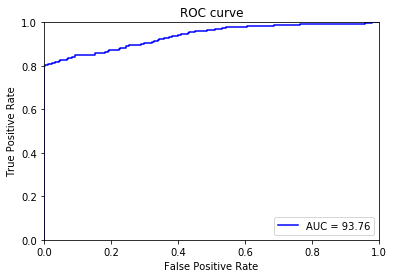

In [80]:
logreg = LogisticRegression(random_state = 42)
train_model(logreg, 'Logistic Regression')

Decision Tree
confusion_matrix
       0       1
0  90322  166358
1      9     302
accuracy_score 35.26349171760879
precision_score 0.1812072482899316
recall_score 97.10610932475883
f1_score 0.36173946373921223


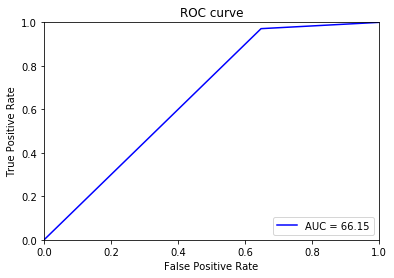

In [81]:
dt = DecisionTreeClassifier(random_state=42)
train_model(dt, 'Decision Tree')

In [ ]:
rf = RandomForestClassifier(random_state=42)
train_model(rf, 'Random Forest')

Random Forest


**Cross-validation**

In [ ]:
score_lr=cross_val_score(estimator=logreg,X=X_res,y=y_res,cv=5)
acc_lr = score_lr.mean()*100
print('Logistic-regression accuracy after cross-validation',acc_lr)

score_dt=cross_val_score(estimator=dt,X=X_res,y=y_res,cv=5)
acc_dt = score_dt.mean()*100
print('Decision Tree accuracy after cross-validation',acc_dt)
      
score_rf=cross_val_score(estimator=rf,X=X_res,y=y_res,cv=5)
acc_rf = score_rf.mean()*100
print('Random Forest accuracy after cross-validation',acc_rf)

Lets check performance of Logistic regression with new threshold.

In [ ]:
#Logistic Regression with new threshold
Threshold = 0.8
preds1 = logreg.predict_proba(X_test)[:,1]
preds = np.where(preds1>Threshold,1,0)

threshold_score = pd.DataFrame(data = [metrics.accuracy_score(y_test,preds)*100,
                                      metrics.recall_score(y_test,preds)*100,
                                      metrics.precision_score(y_test,preds)*100,
                                      metrics.f1_score(y_test,preds)*100
                                      ],
                              index = ['accuracy','recall','precision','f1_score'],columns = ['values'])
accuracy['Logistic_reg_newThresold'] = threshold_score.values[0][0]
recall['Logistic_reg_newThresold'] = threshold_score.values[1][0]
precision['Logistic_reg_newThresold'] = threshold_score.values[2][0]
f_score['Logistic_reg_newThresold'] = threshold_score.values[3][0]

print(threshold_score)
print('Confusion matrix\n',pd.DataFrame(confusion_matrix(y_test, preds)))

**Comparing performace of the models**

In [ ]:
fig, axs=plt.subplots(1,4,figsize=(30,6))

for tick in axs[0].get_xticklabels():
    tick.set_rotation(90)
    tick.set_size(20)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(90)
    tick.set_size(20)
for tick in axs[2].get_xticklabels():
    tick.set_rotation(90)
    tick.set_size(20)
for tick in axs[3].get_xticklabels():
    tick.set_rotation(90)
    tick.set_size(20)

axs[0].set_ylabel('Accuracy %', size = 20)
axs[1].set_ylabel('Recall %', size =20)
axs[2].set_ylabel('Precision %', size =20)
axs[3].set_ylabel('f1_score %', size =20)
fig.align_ylabels()

axs[0].set_title('Models accuracy', size =30)
axs[1].set_title('Models recall', size=30)
axs[2].set_title('Models precision', size=30)
axs[3].set_title('Models f1_score', size=30)

sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), ax= axs[0])
sns.barplot(x=list(recall.keys()), y=list(recall.values()), ax = axs[1])
sns.barplot(x=list(precision.keys()), y=list(precision.values()), ax =axs[2])
sns.barplot(x=list(f_score.keys()), y=list(f_score.values()), ax =axs[3])



From above plot we observed that logistic regression with threshold = 0.8 gave us better performance in terms of accuracy, precision, recall and f1 score.